In [ ]:
from google.colab import files
import pandas as pd

# Upload the file manually
uploaded = files.upload()

# Load the uploaded file into a Pandas DataFrame
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")
    df = pd.read_csv(filename)  # Change to read_excel(filename) if using an Excel file

# Display the first few rows
df.head()


In [3]:
from google.colab import files
import pandas as pd

# Upload the file manually
uploaded = files.upload()

# Load the uploaded file into a Pandas DataFrame
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")
    df = pd.read_csv(filename)  # Change to read_excel(filename) if using an Excel file

# Display the first few rows
df.head()


Saving emotional_features.csv to emotional_features (1).csv
Saving profile_features.csv to profile_features (1).csv
Saving statistical_features.csv to statistical_features (1).csv
Saving textual_features.csv to textual_features (1).csv
Uploaded file: emotional_features (1).csv
Uploaded file: profile_features (1).csv
Uploaded file: statistical_features (1).csv
Uploaded file: textual_features (1).csv


,user_id,tri_grams
0,346,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1217,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,590,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1243,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,543,"[0.0, 0.0, 0.05178241123988141, 0.0, 0.0, 0.0,..."


In [4]:
import pandas as pd

# List of dataset filenames (Update these based on your uploaded files)
filenames = ["Users.csv", "profile_features.csv", "statistical_features.csv", "textual_features.csv", "emotional_features.csv"]

# Check each dataset
for file in filenames:
    try:
        df = pd.read_csv(file)
        print(f"🔹 Dataset: {file}")
        print(df.head())  # Show first few rows
        print("\nColumns:\n", df.columns)  # Show column names
        print("\nMissing Values:\n", df.isnull().sum())  # Check missing values
        print("\n-----------------------------\n")
    except Exception as e:
        print(f"Error loading {file}: {e}")


🔹 Dataset: Users.csv
   user_id  N_False  N_True
0      344        0       1
1     1198        2       0
2      584        0       1
3     1222        0       1
4      537        2       0

Columns:
 Index(['user_id', 'N_False', 'N_True'], dtype='object')

Missing Values:
 user_id    0
N_False    0
N_True     0
dtype: int64

-----------------------------

🔹 Dataset: profile_features.csv
   user_id  statuses_count  followers_count  following_count  \
0      346        0.110131         0.269398         0.755670   
1     1217        0.963784         0.102310         0.001567   
2      590        0.433809         0.661664         0.601345   
3     1243        0.965000         0.166515         0.150806   
4      543        0.566996         0.073917         0.010032   

   favourites_count  listed_count  default_profile  verified  tweet_freq  \
0          0.374446      0.000000         0.001694       0.0    0.055066   
1          0.225275      0.000114         0.000000       0.0    0.096378 

In [5]:
import pandas as pd

# Load datasets
users = pd.read_csv("Users.csv")
statistical = pd.read_csv("statistical_features.csv")
textual = pd.read_csv("textual_features.csv")
emotional = pd.read_csv("emotional_features.csv")

# Merge all required datasets on 'user_id'
df = users.merge(statistical, on="user_id").merge(textual, on="user_id").merge(emotional, on="user_id")

# Remove 'user_id' (as it’s just an identifier)
df.drop(columns=['user_id'], inplace=True)

# Convert N_False and N_True into a single binary label
df['label'] = df['N_True'].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=['N_False', 'N_True'], inplace=True)

# Display the final dataset structure
print("🔹 Final Dataset Structure:\n", df.head())
print("\n🔹 Missing Values:\n", df.isnull().sum())


🔹 Final Dataset Structure:
    non_duplicate  hashtags_prop  hashtags_per_twt_prop  mentions_prop  \
0       0.000248       0.000192               0.000490       0.000162   
1       0.001467       0.001383               0.003002       0.000645   
2       0.012304       0.001656               0.019749       0.011831   
3       0.000619       0.000264               0.001104       0.000368   
4       0.010332       0.009359               0.024799       0.000624   

   n_unique_mentions  replies_prop  urls_prop   qt_prop  media_prop  count_RT  \
0           0.003262      0.000000   0.000003  0.000006    0.000086  0.014054   
1           0.339085      0.000002   0.000416  0.000000    0.000820  0.935052   
2           0.989539      0.011358   0.009701  0.008637    0.000946  0.043656   
3           0.477505      0.000089   0.000058  0.000056    0.000101  0.873257   
4           0.993112      0.000000   0.000068  0.000000    0.010274  0.093104   

   ...   disgust      fear       joy      love

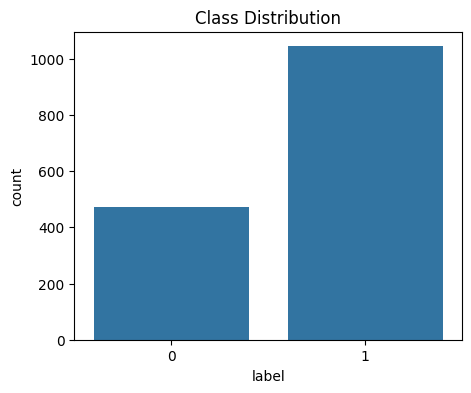

🔹 Label Counts:
 label
1    1044
0     472
Name: count, dtype: int64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(5, 4))
sns.countplot(x=df['label'])
plt.title("Class Distribution")
plt.show()

# Print class counts
print("🔹 Label Counts:\n", df['label'].value_counts())


In [17]:
print("Available Columns in df:\n", df.columns)


Available Columns in df:
 Index(['non_duplicate', 'hashtags_prop', 'hashtags_per_twt_prop',
       'mentions_prop', 'n_unique_mentions', 'replies_prop', 'urls_prop',
       'qt_prop', 'media_prop', 'count_RT', 'avg_engagement',
       'avg_days_between_tweets', 'tri_grams', 'anger', 'anticipation',
       'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness',
       'surprise', 'trust', 'label'],
      dtype='object')


In [19]:
import shutil

# Remove old NLTK data
shutil.rmtree('/root/nltk_data', ignore_errors=True)

print("✅ Deleted corrupted NLTK data!")


✅ Deleted corrupted NLTK data!


In [20]:
!wget https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/stopwords.zip
!unzip stopwords.zip -d /root/nltk_data/corpora/


--2025-03-11 00:54:59--  https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/stopwords.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36779 (36K) [application/zip]
Saving to: ‘stopwords.zip’

stopwords.zip       100%[===================>]  35.92K  --.-KB/s    in 0.006s  

2025-03-11 00:54:59 (5.77 MB/s) - ‘stopwords.zip’ saved [36779/36779]

Archive:  stopwords.zip
checkdir:  cannot create extraction directory: /root/nltk_data/corpora
           No such file or directory


In [22]:
import os

# Create the missing directory manually
os.makedirs('/root/nltk_data/corpora/stopwords', exist_ok=True)

print("✅ Created missing stopwords directory!")


✅ Created missing stopwords directory!


In [23]:
!wget https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/stopwords.zip


--2025-03-11 00:56:42--  https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/stopwords.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36779 (36K) [application/zip]
Saving to: ‘stopwords.zip.1’

stopwords.zip.1     100%[===================>]  35.92K  --.-KB/s    in 0.007s  

2025-03-11 00:56:42 (5.24 MB/s) - ‘stopwords.zip.1’ saved [36779/36779]



In [24]:
!unzip stopwords.zip -d /root/nltk_data/corpora/


Archive:  stopwords.zip
  inflating: /root/nltk_data/corpora/stopwords/albanian  
  inflating: /root/nltk_data/corpora/stopwords/dutch  
  inflating: /root/nltk_data/corpora/stopwords/catalan  
  inflating: /root/nltk_data/corpora/stopwords/german  
  inflating: /root/nltk_data/corpora/stopwords/slovene  
  inflating: /root/nltk_data/corpora/stopwords/hinglish  
  inflating: /root/nltk_data/corpora/stopwords/hungarian  
  inflating: /root/nltk_data/corpora/stopwords/romanian  
  inflating: /root/nltk_data/corpora/stopwords/kazakh  
  inflating: /root/nltk_data/corpora/stopwords/turkish  
  inflating: /root/nltk_data/corpora/stopwords/russian  
  inflating: /root/nltk_data/corpora/stopwords/README  
  inflating: /root/nltk_data/corpora/stopwords/italian  
  inflating: /root/nltk_data/corpora/stopwords/english  
  inflating: /root/nltk_data/corpora/stopwords/greek  
  inflating: /root/nltk_data/corpora/stopwords/tajik  
  inflating: /root/nltk_data/corpora/stopwords/norwegian  
  inflati

In [25]:
import os
print("✅ Stopwords Exist:", os.path.exists('/root/nltk_data/corpora/stopwords/english'))


✅ Stopwords Exist: True


In [26]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print("✅ Stopwords Loaded Successfully!")


✅ Stopwords Loaded Successfully!


In [30]:
import shutil

# Delete NLTK's tokenizers folder to force a fresh download
shutil.rmtree('/root/nltk_data/tokenizers', ignore_errors=True)

print("✅ Deleted old tokenizers folder!")


✅ Deleted old tokenizers folder!


In [31]:
import nltk

nltk.download('punkt')

print("✅ Successfully downloaded `punkt`!")


✅ Successfully downloaded `punkt`!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
import os
print("✅ Punkt Exists:", os.path.exists('/root/nltk_data/tokenizers/punkt'))


✅ Punkt Exists: False


In [33]:
import os

# Manually create the missing tokenizers directory
os.makedirs('/root/nltk_data/tokenizers', exist_ok=True)

print("✅ Created missing tokenizers directory!")


✅ Created missing tokenizers directory!


In [34]:
!wget https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/tokenizers/punkt.zip


--2025-03-11 01:00:41--  https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/tokenizers/punkt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13905355 (13M) [application/zip]
Saving to: ‘punkt.zip’

punkt.zip           100%[===================>]  13.26M  --.-KB/s    in 0.1s    

2025-03-11 01:00:42 (138 MB/s) - ‘punkt.zip’ saved [13905355/13905355]



In [35]:
!unzip -o punkt.zip -d /root/nltk_data/tokenizers/


Archive:  punkt.zip
   creating: /root/nltk_data/tokenizers/punkt/
  inflating: /root/nltk_data/tokenizers/punkt/greek.pickle  
  inflating: /root/nltk_data/tokenizers/punkt/estonian.pickle  
  inflating: /root/nltk_data/tokenizers/punkt/turkish.pickle  
  inflating: /root/nltk_data/tokenizers/punkt/polish.pickle  
   creating: /root/nltk_data/tokenizers/punkt/PY3/
  inflating: /root/nltk_data/tokenizers/punkt/PY3/greek.pickle  
  inflating: /root/nltk_data/tokenizers/punkt/PY3/estonian.pickle  
  inflating: /root/nltk_data/tokenizers/punkt/PY3/turkish.pickle  
  inflating: /root/nltk_data/tokenizers/punkt/PY3/polish.pickle  
  inflating: /root/nltk_data/tokenizers/punkt/PY3/russian.pickle  
  inflating: /root/nltk_data/tokenizers/punkt/PY3/czech.pickle  
  inflating: /root/nltk_data/tokenizers/punkt/PY3/portuguese.pickle  
  inflating: /root/nltk_data/tokenizers/punkt/PY3/README  
  inflating: /root/nltk_data/tokenizers/punkt/PY3/dutch.pickle  
  inflating: /root/nltk_data/tokenizers/

In [36]:
import os
print("✅ Punkt Exists:", os.path.exists('/root/nltk_data/tokenizers/punkt'))


✅ Punkt Exists: True


In [38]:
import string

def preprocess_text(text):
    if isinstance(text, str):  # Ensure input is a string
        text = text.lower()  # Convert to lowercase
        text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
        words = text.split()  # Use simple split instead of word_tokenize
        words = [word for word in words if word not in stop_words]  # Remove stopwords
        return " ".join(words)
    return ""

# Apply text preprocessing
df['clean_text'] = df['tri_grams'].apply(preprocess_text)

# Check if `clean_text` is successfully created
print("✅ Sample Processed Text:\n", df[['tri_grams', 'clean_text']].head())


✅ Sample Processed Text:
                                            tri_grams  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                          clean_text  
0  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 0...  
1  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 0...  
2  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 0...  
3  00 00 00 00 00 00 00 00 00 00 00 00 00 00 0029...  
4  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 0...  


In [39]:
print("🔹 Data Type of `tri_grams` Column:", type(df['tri_grams'][0]))
print("🔹 Sample Value in `tri_grams` Column:", df['tri_grams'][0])


🔹 Data Type of `tri_grams` Column: <class 'str'>
🔹 Sample Value in `tri_grams` Column: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010867907661947057, 0.0, 0.0, 0.0, 0.0, 0.029725009110919576, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02212580219823284, 0.026651443152632008, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [41]:
import ast
import numpy as np

# Convert `tri_grams` column from string to list
df['tri_grams'] = df['tri_grams'].apply(ast.literal_eval)

# Convert list into a NumPy array for ML model
X = np.array(df['tri_grams'].tolist())

print("✅ `tri_grams` converted to numerical features!")
print("🔹 Shape of X:", X.shape)  # Should be (num_samples, num_features)


✅ `tri_grams` converted to numerical features!
🔹 Shape of X: (1516, 42939)


In [42]:
y = df['label'].values  # Convert label column to NumPy array
print("✅ Target variable `y` is ready!")
print("🔹 Shape of y:", y.shape)  # Should be (num_samples,)


✅ Target variable `y` is ready!
🔹 Shape of y: (1516,)


In [43]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data split successfully!")
print("🔹 X_train shape:", X_train.shape)
print("🔹 X_test shape:", X_test.shape)


✅ Data split successfully!
🔹 X_train shape: (1212, 42939)
🔹 X_test shape: (304, 42939)


In [44]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check balanced class distribution
import pandas as pd
print("✅ SMOTE applied successfully!")
print(pd.Series(y_train_smote).value_counts())  # Should be balanced


✅ SMOTE applied successfully!
1    834
0    834
Name: count, dtype: int64


In [45]:
# Load all datasets (Assuming you've already read them into pandas DataFrames)
df_users = pd.read_csv("Users.csv")
df_profile = pd.read_csv("profile_features.csv")
df_stats = pd.read_csv("statistical_features.csv")
df_text = pd.read_csv("textual_features.csv")
df_emotion = pd.read_csv("emotional_features.csv")

# Merge based on `user_id`
df_merged = df_users.merge(df_profile, on='user_id', how='left')
df_merged = df_merged.merge(df_stats, on='user_id', how='left')
df_merged = df_merged.merge(df_text, on='user_id', how='left')
df_merged = df_merged.merge(df_emotion, on='user_id', how='left')

# Drop `user_id` since it's not needed for model training
df_merged.drop(columns=['user_id'], inplace=True)

print("✅ All datasets merged successfully! Shape:", df_merged.shape)


✅ All datasets merged successfully! Shape: (1546, 43)


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Check Missing Values
print("Missing Values:\n", df_merged.isnull().sum())

# 2️⃣ Check Class Distribution
plt.figure(figsize=(5, 4))
sns.countplot(x=df_merged['label'])
plt.title("Class Distribution")
plt.show()

# 3️⃣ Plot Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_merged.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


Missing Values:
 N_False                       0
N_True                        0
statuses_count                0
followers_count               0
following_count               0
favourites_count              0
listed_count                  0
default_profile               0
verified                      0
tweet_freq                    0
follower_growth_rate          0
following_growth_rate         0
listed_growth_rate            0
followers_following_ratio     0
screen_name_length            0
digits_in_screen_name         0
name_length                   0
digits_in_name                0
description_length            0
non_duplicate                 0
hashtags_prop                 0
hashtags_per_twt_prop         0
mentions_prop                 0
n_unique_mentions             0
replies_prop                  0
urls_prop                     0
qt_prop                       0
media_prop                    0
count_RT                      0
avg_engagement                0
avg_days_between_tweets

KeyError: 'label'

<Figure size 500x400 with 0 Axes>